# 주식 데이터 추출

## **`1` 라이브러리 활용 주식 추출**

In [7]:
!pip install yfinance

!pip install matplotlib

!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9683 sha256=f098288bc6463d0faeb72fda7c74a5f36f5279509951a21fb19489e16aafe838
  Stored in directory: c:\users\ijmwo\appdata\local\pip\cache\wheels\8a\b8\04\0c88fb22489b0c049bee4e977c5689c7fe597d6c4b0e7d0b6a
Successfully built wget


  DEPRECATION: Building 'wget' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wget'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [10]:
import yfinance as yf

import wget

In [11]:
apple = yf.Ticker("AAPL")  # ticker 모듈 사용, ticker symbol : "AAPL"

In [13]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
wget.download(url)  # wget모듈로 url에서 파일 다운로드

'apple.json'

In [15]:
import json
with open('apple.json') as json_file:  # 'apple.json' 파일을 읽기 모드로 열고 json_file 변수에 저장
    apple_info = json.load(json_file)  # 파일 내용을 JSON 형식으로 파싱해서 apple_info에 저장
    print("Type:", type(apple_info))
apple_info

Type: <class 'dict'>


{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

### share price(주가) 추출

In [16]:
# history()와 period로 일정기간 동안의 주가 수집
apple_share_price_data = apple.history(period="max")

In [17]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0


In [19]:
apple_share_price_data.shape

(11241, 7)

In [20]:
# reset_index()와 inplace 활용
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0


In [24]:
apple_share_price_data.loc[0, 'Volume']

np.int64(469033600)

<Axes: xlabel='Date'>

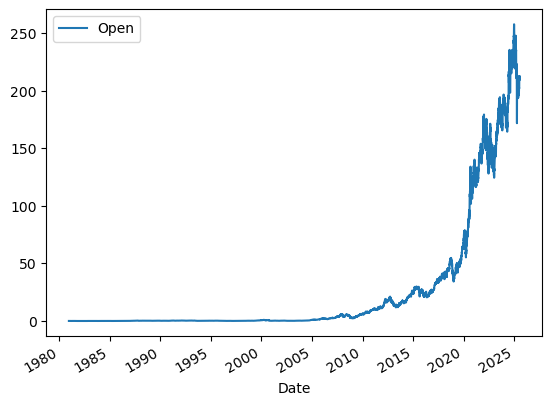

In [21]:
apple_share_price_data.plot(x="Date", y="Open")

### Dividends(배당금) 추출

In [22]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
Name: Dividends, Length: 87, dtype: float64

<Axes: xlabel='Date'>

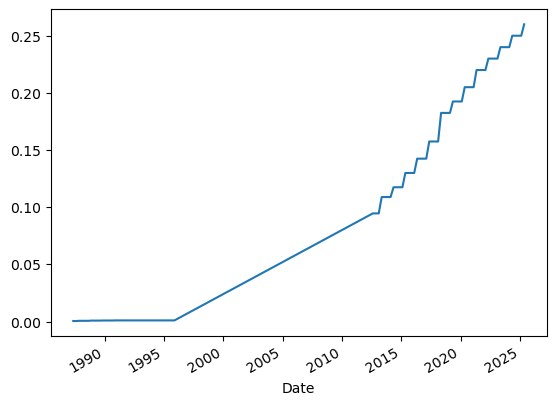

In [23]:
apple.dividends.plot()

## **`2` 웹스크래핑 활용 주식 추출**
- Steps for extracting data
    1. requests 라이브러리로 HTTP 요청을 웹페이지에 보냄
    2. BeautifulSoup으로 HTML 내용을 파싱함
    3. 원하는 데이터를 포함하는 HTML 태그를 확인함
    4. BeautifulSoup 함수들로 HTML 태그로부터 데이터를 추출함
    5. 추출된 데이터를 프린트

In [27]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [28]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [29]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### `(1)` requests 라이브러리로 HTTP 요청을 웹페이지에 보냄

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
data  = requests.get(url).text  # .text로 읽을 수 있는 문자열 형태로 추출

#### `(2)` BeautifulSoup으로 HTML 내용을 파싱함 (parsing)

In [31]:
# 첫 번째 요소 : 파싱하고 싶은 HTML or XML 형식의 내용
# 두 번째 요소 : parser의 이름 선택적 지정. 이 경우, html5lib의 parser 지정하여 사용함 

soup = BeautifulSoup(data, 'html.parser')

#### `(3)` 원하는 데이터를 포함하는 HTML 태그를 확인함

HTML 테이블의 태그 구성요소
- table
- tr
- td
- th
- tbody

In [32]:
# 열들을 지정하여 빈 데이터프레임을 생성
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

#### `(4)` BeautifulSoup 함수들로 HTML 태그로부터 데이터를 추출함

In [35]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    # 각 행을 테이블에 추가하고 새로운 인덱스 부여 (pd.concat([df1, df2], ignore_index=True)
    netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)

#### `(5)` 추출된 데이터를 프린트

In [36]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


#### pandas 라이브러리의 read_html 활용 방식

In [37]:
read_html_pandas_data = pd.read_html(url)

# 페이지에 단 1개의 테이블만 있으므로 1번째 테이블 선택
netflix_dataframe = read_html_pandas_data[0] 

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [41]:
netflix_data.shape

(70, 7)

In [42]:
# 마지막 행의 'Open'열 값 가져오기

print(netflix_data.loc[69, 'Open'])
print(netflix_data.iloc[-1]['Open'])

109.35
109.35
